# Propulsion Module Examples
Solving the course examples of AC701.

In [1]:
import model_reference as mf
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Example 2.1: TurboJet

### Exercise Information

 Calculate the specific thrust and specific consumption (TSFC) for a turbojet engine operating at Mach 0.85 and at 12,200 m (Pa = 18.75kPa and Ta = 216.7 K). Use the data below for efficiencies and specific heat ratios.

| Component  | Adiabatic Efficiency | Specific Heat Ratio |
|------------|----------------------|---------------------|
| diffuser   | 0,97                 | 1,40                |
| compressor | 0,85                 | 1,37                |
| combustion | 1,00                 | 1,35                |
| turbine    | 0.90                 | 1,33                |
| nozzle     | 0,98                 | 1,36                |

Operating Parameters:

| Pressure Ration in Compressor            | 30                |
|------------------------------------------|-------------------|
| Outlet temperature in combustion chamber | 1600 K            |
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |



### Exercise Computation

In [2]:
values_ex2_1 = {
    'ta':216.7,
    'pa':18750,
    'n_d':0.97,
    'gamma_d':1.4,
    'n_c':0.85,
    'gamma_c':1.37,
    'n_b':1,
    'gamma_b':1.35,
    'n_t':0.9,
    'gamma_t':1.33,
    'n_n':0.98,
    'gamma_n':1.36,
    'prc':30,
    'pc_fuel':45000,
    'cp_fuel':1.110,
    'r':288.3,
    't04':1600,
    'mach':0.85
    }

turbojet = mf.TurboJet(values_ex2_1)
result_2_1 = (
    turbojet.sumarise().
    append(turbojet.sumarise_results()).
    loc[['t02','p02','t03', 'p03', 'f', 't05', 'p05', 'u_s', 'TSFC', 'u_i', 'specific_thrust']]
)
result_2_1

,1
t02,248.013150
p02,29674.830041
t03,687.349061
p03,890244.901227
f,0.023437
t05,1160.664089
p05,205315.934991
u_s,1078.304658
TSFC,0.000028
u_i,251.382314


## Example 2.2: TurboFan

### Exercise Information

 Calculate the specific thrust and specific consumption (TSFC) for a turbofan engine operating at Mach 0.85 and at 12,200 m (Pa = 18.75kPa and Ta = 216.7 K). Use the data below for efficiencies and specific heat ratios.

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,97                 | 1,40                |
| fan                | 0,85                 | 1,40                |
| compressor         | 0,85                 | 1,37                |
| combustion         | 1,00                 | 1,35                |
| compressor turbine | 0.90                 | 1,33                |
| compressor fan     | 0.90                 | 1,33                |
| Hot air nozzle     | 0,98                 | 1,36                |
| Fan nozzle         | 0,98                 | 1,40                |

Operating Parameters:

| Outlet temperature in combustion chamber | 1600 K            |
|------------------------------------------|-------------------|
| Pressure Ration in Compressor            | 20                |
| Pressure Ration in Fan                   | 1.5               |
| Air passsage ratio                       | 5.0               |
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |



### Exercise Computation

In [3]:
values_ex2_2 = {
    'ta':216.7,
    'pa':18.750,
    'n_d':0.97,
    'n_c':0.85,
    'n_f':0.85,
    'n_b':1,
    'n_t':0.9,
    'n_tf':0.9,
    'n_n':0.98,
    'n_nf':0.98,
    'gamma_d':1.4,
    'gamma_f':1.4,
    'gamma_c':1.37,
    'gamma_b':1.35,
    'gamma_t':1.33,
    'gamma_tf':1.33,
    'gamma_n':1.36,
    'gamma_nf':1.4,
    'prc':20,
    'prf':1.5,
    'bypass_ratio':5,
    'pc_fuel':45000,
    'cp_fuel':1.110,
    'r':288.3,
    't04':1600,
    'mach':0.85
    }

turbofan = mf.TurboFan(values_ex2_2)
target = ['t02','p02','t08','p08','t03', 'p03', 'f','tet','pet', 't05', 'p05', 'u_s', 'u_sf','u_i', 'specific_thrust', 'TSFC']
result_2_2 = (
    turbofan.sumarise().
    append(turbofan.sumarise_results()).
    loc[target]
)
result_2_2.columns = ['turbofan']
result_2_2['turbojet'] = result_2_1
result_2_2

,turbofan,turbojet
t02,248.013150,248.013150
p02,29.674830,29674.830041
t08,283.850835,NaN
p08,44.512245,NaN
t03,699.879407,687.349061
p03,890.244901,890244.901227
f,0.023115,0.023437
tet,1183.971427,NaN
pet,225.280587,NaN
t05,968.945318,1160.664089


## Example 2.3: TurboFan - Baseline Project Computation

### Exercise Information

Operating Engine Parameters:

| Baseline Operating Condition             |                   |
|------------------------------------------|-------------------|
| Mass Flux                                | 756 kg/s          |
| Outlet temperature in combustion chamber | 1550 K            |
| Pressure Ration in Compressor            | 17.2              |
| Pressure Ration in Booster               | 1.00              |
| Pressure Ration in Fan                   | 1.69              |
| Air bypass ratio                         | 4.69              |
| Pressure loss in combustion chamber      |  5 %              |

Operating Condition:

| Flight Operation Condition               |                   |
|------------------------------------------|-------------------|
| Flight  Mach                             | 0                 |
| Atmospheric Pressure                     | 101.63 kPa        |
| Atmospheric Temperature                  | 290 K             |
| % of maximum compressor rotation         | 1.00              |


Efficiency and specific heat ratio data:

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,97                 | 1,40                |
| fan                | 0,93                 | 1,40                |
| compressor         | 0,90                 | 1,37                |
| combustion         | 0,9995               | 1,35                |
| compressor turbine | 0.95                 | 1,33                |
| compressor fan     | 0.932                | 1,33                |
| Hot air nozzle     | 0,98                 | 1,36                |
| Fan nozzle         | 0,98                 | 1,40                |

Thermodynamic Data:

| Thermodynamic Data                       |                   |
|------------------------------------------|-------------------|
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |



### Exercise Computation

In [4]:
values_ex2_3 = {
    'ta':290,
    'pa':101.630,
    'n_d':0.97,
    'n_f':0.93,
    'n_c':0.90,
    'n_b':0.9995,
    'n_t':0.95,
    'n_tf':0.932,
    'n_n':0.98,
    'n_nf':0.98,
    'gamma_d':1.4,
    'gamma_f':1.4,
    'gamma_c':1.37,
    'gamma_b':1.35,
    'gamma_t':1.33,
    'gamma_tf':1.33,
    'gamma_n':1.36,
    'gamma_nf':1.4,
    'prc':17.2,
    'prf':1.69,
    'bypass_ratio':4.749,
    'pc_fuel':45000,
    'cp_fuel':1.110,
    'r':288.3,
    't04':1550,
    'mach':0,
    'mass_flow':756,
    'pressure_loss':0.05
    }

turbofan23 = mf.TurboFan(values_ex2_3)

summarise_target = ['n1', 'thrust_total', 'TSFC', 'prf', 'prc', 't04','hot_mass_flow','bypass_ratio']


results = (
    turbofan23.sumarise().
    append(turbofan23.sumarise_results()).
    loc[summarise_target]
)

for i in np.arange(0.9,0.4,-0.1):
    turbofan23.set_n2(i)
    results[i] = (
        turbofan23.sumarise().
        append(turbofan23.sumarise_results()).
        loc[summarise_target]
    )

results.loc['total_fuel_comsuntion'] = results.loc['TSFC'] * results.loc['thrust_total']
results.loc['pr_global'] = results.loc['prc'] * results.loc['prf']

ordered_target = ['n1', 'thrust_total', 'TSFC', 'prf', 'prc', 'pr_global', 't04','hot_mass_flow','total_fuel_comsuntion','bypass_ratio']
results = results.loc[ordered_target]


In [5]:
import matplotlib.pyplot as plt

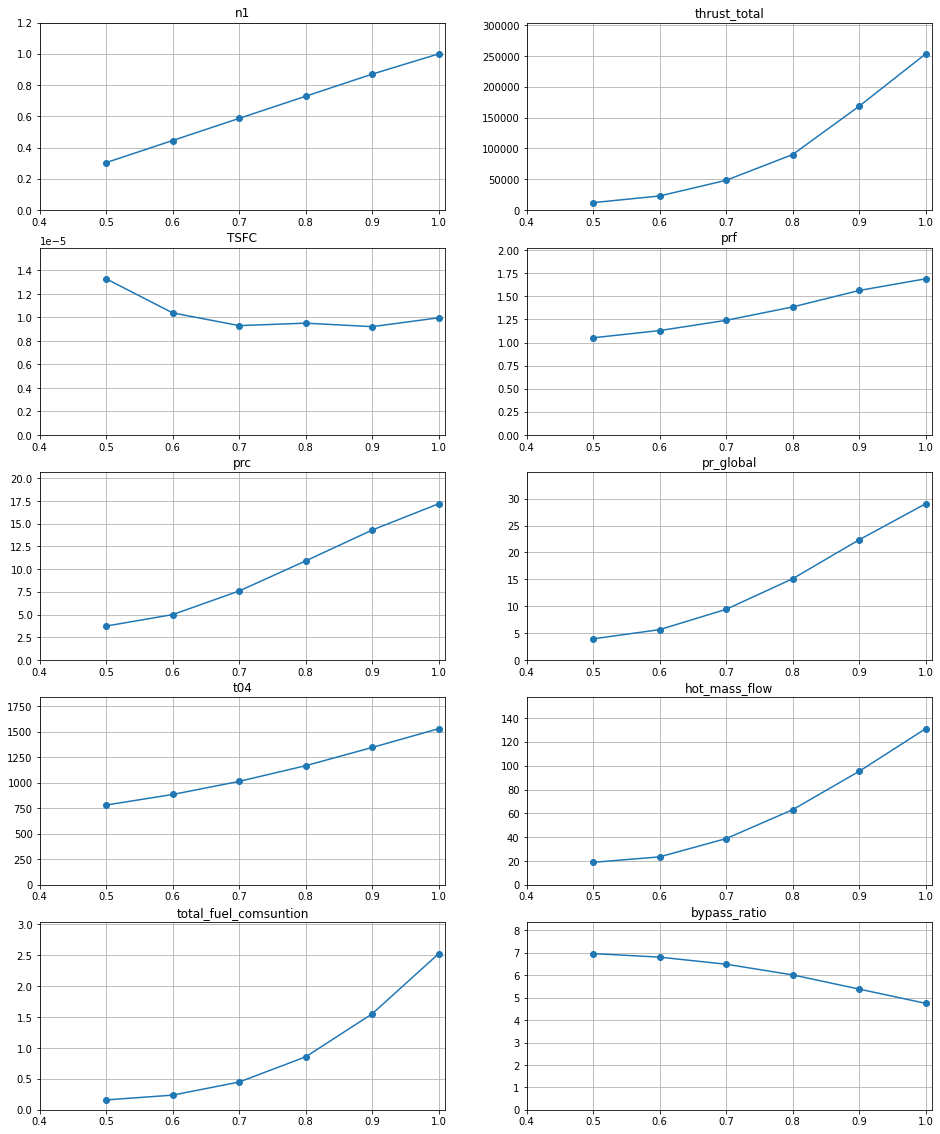

In [6]:
cols = 2
rows=5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))
aux=0
for i in range(0,rows):
    for j in range(0,cols):
        plt.sca(ax[i,j])
        plt.plot(results.iloc[aux], marker='o')
        plt.axis([0.4,1.01,0,max(results.iloc[aux])*1.2])
        plt.grid()
        plt.title(results.index[aux])
        aux += 1


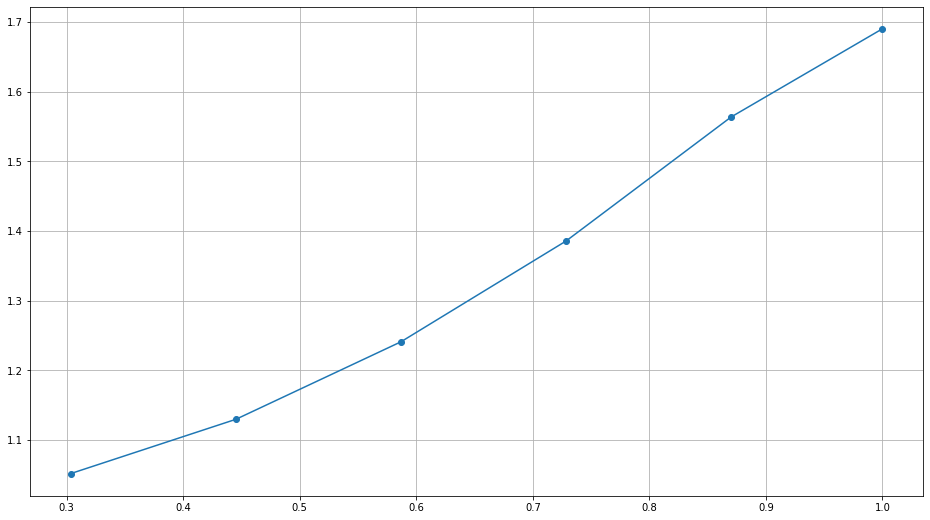

In [7]:
plt.figure(figsize=(16,9))
plt.plot(results.loc['n1'],results.loc['prf'], marker='o')
plt.grid()

## Example 7.1: TurboProp - Calibrating Model

### Exercise Information

Taking the data for the PW127 engine at sea level and stationary: free turbine shaft power 2457 kW, compressor air flow 8.49 kg/s, compressor pressure ratio 15.77 and combustion chamber outlet temperature 1600K. Calibrate the engine in the performance simulation to obtain shaft power close to the reported by the manufacturer.

Operating Engine Parameters:

| Baseline Operating Condition             |                   |
|------------------------------------------|-------------------|
| Mass Flux                                | 8.49 kg/s         |
| Outlet temperature in combustion chamber | 1600 K            |
| Pressure Ration in Compressor            | 15.77             |


Operating Condition:

| Flight Operation Condition               |                   |
|------------------------------------------|-------------------|
| Flight  Mach                             | 0                 |
| Atmospheric Pressure                     | 101.30 kPa        |
| Atmospheric Temperature                  | 288.15 K          |
| % of maximum compressor rotation         | 1.00              |


Efficiency and specific heat ratio data:

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,85                 | 1,40                |
| compressor         | 0,75                 | 1,37                |
| combustion         | 1,00                 | 1,35                |
| compressor turbine | 0,90                 | 1,33                |
| free turbine       | 0,90                 | 1,33                |
| hot air nozzle     | 0,98                 | 1,36                |

Thermodynamic Data:

| Thermodynamic Data                       |                   |
|------------------------------------------|-------------------|
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |








### Part 1: Exercise computation
Calibrating the model to the manufacturer report with pressure ratio in the turbine equal to 2.87 and % of maximum rotation equals to 1.00.

,1.800000,1.977778,2.155556,2.333333,2.511111,2.688889,2.866667,3.044444,3.222222,3.400000
BSFC,0.000134,0.000117,0.000105,0.000096,0.000089,0.000083,0.000079,0.000075,0.000072,0.000069
EBSFC,0.000134,0.000117,0.000105,0.000096,0.000089,0.000083,0.000079,0.000075,0.000072,0.000069
TSFC,0.035138,0.037701,0.040557,0.043800,0.047565,0.052051,0.057575,0.064689,0.074449,0.089252
aircraft_speed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fuel_consumption,0.193306,0.193306,0.193306,0.193306,0.193306,0.193306,0.193306,0.193306,0.193306,0.193306
gearbox_power,1416.250516,1624.600535,1810.793280,1978.741280,2131.431266,2271.191301,2399.868727,2518.952252,2629.657894,2732.990830
mass_flow,8.487905,8.487905,8.487905,8.487905,8.487905,8.487905,8.487905,8.487905,8.487905,8.487905
specific_power_turbine,170.260334,195.307982,217.691903,237.882457,256.238706,273.040529,288.510011,302.826123,316.135053,328.557644
specific_thrust,0.648138,0.604081,0.561540,0.519956,0.478803,0.437542,0.395556,0.352057,0.305904,0.255169
thrust_hot_air,5.501335,5.127386,4.766301,4.413335,4.064033,3.713812,3.357438,2.988227,2.596487,2.165851


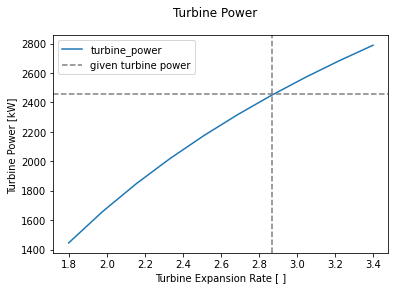

In [26]:
import model_reference as mf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
# warnings.filterwarnings('ignore')

values = {
    'mass_flow': 8.49,
    't04': 1600,
    'prc': 15.77,
    'u_in': 0,
    'ta': 288.15,
    'pa': 101.30,
    'n_d': 0.85,
    'gamma_d': 1.4,
    'n_c': 0.75,
    'gamma_c': 1.37,
    'n_b': 1,
    'gamma_b': 1.35,
    'n_t': 0.9,
    'gamma_t': 1.33,
    'n_tl': 0.9,
    'gamma_tl': 1.33,
    'n_n': 0.98,
    'gamma_n': 1.36,
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'cp_tl': 1.160,
    'r': 288.3,
    'pr_tl': 2.87,
    'gearbox_power_ratio': 0.98,
    'propeller_efficiency': 0.85,
    }


target = [
    'specific_power_turbine', 
    'turbine_power', 
    'gearbox_power', 
    'specific_thrust', 
    'BSFC', 
    'EBSFC', 
    'TSFC', 
    'thrust_hot_air', 
    'thrust_propeller', 
    'fuel_consumption', 
    'thrust_total',
    'mass_flow',
    'aircraft_speed'
    ]

list_of_turbine_pressure_ratio = np.linspace(1.8, 3.4, 10)
turboprop = mf.TurboProp(values)
performance_results = turboprop.sumarise_results()
performance_results = performance_results.drop(columns=[1])

for turbine_pressure_ratio in list_of_turbine_pressure_ratio:
    values["pr_tl"] = turbine_pressure_ratio
    turboprop = mf.TurboProp(values)
    performance_result = turboprop.sumarise_results()
    performance_results[turbine_pressure_ratio] = performance_result


fig1 = plt.figure()
fig1.suptitle("Turbine Power")
axis1 = fig1.add_subplot(111)
axis1 = performance_results.loc['turbine_power'].plot()
axis1.set_ylabel("Turbine Power [kW] ")
axis1.set_xlabel("Turbine Expansion Rate [ ]")
axis1.axhline(2457, linestyle='--', color='gray', label='given turbine power')
axis1.axvline(2.87, linestyle='--', color='gray')
axis1.legend()

performance_results

### Part 1 Results:
We have varied the turbine expansion rate to find the turbine power that corresponds to the manufcaturer given turbine power.

From the results above, we find the following parameters to calibrate the model:

| Engine Parameters                        |                   |
|------------------------------------------|-------------------|
| Pressure Ratio in the Free Turbine       | 2.87              |
| % of maximum rotation in the compressor  | 1.00              |

### Part 2: Comparing to Manufacturer Report

The thermodynamic power of the turbine is superior to the limit power of the gearbox 2050 kW.
Thus, the solution is to reduce the compressor rotation.

,0.900,0.905,0.910,0.915,0.920,0.925,0.930,0.935,0.940,0.945,...,0.955,0.960,0.965,0.970,0.975,0.980,0.985,0.990,0.995,1.000
BSFC,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,...,0.000077,0.000077,0.000078,0.000078,0.000078,0.000078,0.000078,0.000079,0.000079,0.000079
EBSFC,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,...,0.000077,0.000077,0.000078,0.000078,0.000078,0.000078,0.000078,0.000079,0.000079,0.000079
TSFC,0.098451,0.093619,0.089434,0.085763,0.082509,0.079598,0.076972,0.074588,0.072410,0.070409,...,0.066850,0.065256,0.063767,0.062370,0.061057,0.059818,0.058646,0.057535,0.056478,0.055471
aircraft_speed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fuel_consumption,0.130620,0.133715,0.136852,0.140028,0.143245,0.146500,0.149793,0.153124,0.156492,0.159896,...,0.166807,0.170313,0.173851,0.177420,0.181019,0.184647,0.188302,0.191984,0.195691,0.199422
gearbox_power,1665.789133,1707.277640,1748.764814,1790.222946,1831.624455,1872.941792,1914.147337,1955.213265,1996.111384,2036.812943,...,2117.507229,2157.437483,2197.045595,2236.295912,2275.150273,2313.567501,2351.502842,2388.907320,2425.727017,2461.902265
mass_flow,6.853109,6.944461,7.035312,7.125618,7.215338,7.304429,7.392847,7.480551,7.567498,7.653646,...,7.823370,7.906862,7.989384,8.070893,8.151346,8.230701,8.308915,8.385946,8.461751,8.536286
specific_power_turbine,248.031189,250.864685,253.642482,256.364864,259.032157,261.644711,264.202885,266.707019,269.157418,271.554320,...,276.188085,278.424831,280.607769,282.736325,284.809634,286.826495,288.785312,290.684025,292.520046,294.290172
specific_thrust,0.193597,0.205674,0.217503,0.229136,0.240614,0.251971,0.263237,0.274436,0.285589,0.296715,...,0.318947,0.330083,0.341248,0.352455,0.363714,0.375036,0.386431,0.397909,0.409480,0.421153
thrust_hot_air,1.326740,1.428298,1.530204,1.632735,1.736110,1.840507,1.946073,2.052934,2.161195,2.270948,...,2.495243,2.609920,2.726363,2.844626,2.964759,3.086809,3.210822,3.336843,3.464916,3.595086


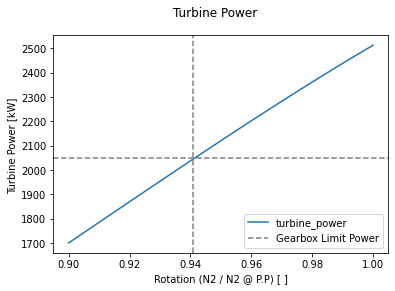

In [30]:
import model_reference as mf
import numpy as np
import pandas as pd
import warnings
# warnings.filterwarnings('ignore')

values = {
    'mass_flow': 8.49,
    't04': 1600,
    'prc': 15.77,
    'u_in': 0,
    'ta': 288.15,
    'pa': 101.30,
    'n_d': 0.85,
    'gamma_d': 1.4,
    'n_c': 0.75,
    'gamma_c': 1.37,
    'n_b': 1,
    'gamma_b': 1.35,
    'n_t': 0.9,
    'gamma_t': 1.33,
    'n_tl': 0.9,
    'gamma_tl': 1.33,
    'n_n': 0.98,
    'gamma_n': 1.36,
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'cp_tl': 1.160,
    'r': 288.3,
    'pr_tl': 2.87,
    'gearbox_power_ratio': 0.98,
    'propeller_efficiency': 0.85,
    }


list_of_n2 = np.linspace(0.9, 1.0, 21)
turboprop = mf.TurboProp(values)
performance_results = turboprop.sumarise_results()
performance_results = performance_results.drop(columns=[1])

for n2 in list_of_n2:
    turboprop.set_n2(n2)
    performance_result = turboprop.sumarise_results()
    performance_results[n2] = performance_result


fig1 = plt.figure()
fig1.suptitle("Turbine Power")
axis1 = fig1.add_subplot(111)
axis1 = performance_results.loc['turbine_power'].plot()
axis1.set_ylabel("Turbine Power [kW] ")
axis1.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
axis1.axhline(2050, linestyle='--', color='gray', label='Gearbox Limit Power')
axis1.axvline(0.941, linestyle='--', color='gray')
axis1.legend()

performance_results


Engine Parameters varied to achieve the manufacture perfomance:

| Engine Parameters                        |                   |
|------------------------------------------|-------------------|
| Pressure Ratio in the Free Turbine       | 2.87              |
| % of maximum rotation in the compressor  | 0.941             |

## Example 7.2: TurboProp - Flight Condition Simulation

### Exercise Information

Now simulate the engine operating at 7,000 m and Mach 0.45, keeping other input parameters constant compared to Example 8.1. As operating strategy consider N1 = 100% and N2 = 85%.

Operating Engine Parameters:

| Baseline Operating Condition             |                   |
|------------------------------------------|-------------------|
| Mass Flux                                | 8.49 kg/s         |
| Outlet temperature in combustion chamber | 1600 K            |
| Pressure Ration in Compressor            | 15.77             |


Operating Condition:

| Flight Operation Condition               |                   |
|------------------------------------------|-------------------|
| Flight  Mach                             | 0.45              |
| Atmospheric Pressure                     | 41.00 kPa         |
| Atmospheric Temperature                  | 246.55 K          |
| % of maximum compressor rotation         | 0.85              |


Efficiency and specific heat ratio data:

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,85                 | 1,40                |
| compressor         | 0,75                 | 1,37                |
| combustion         | 1,00                 | 1,35                |
| compressor turbine | 0,90                 | 1,33                |
| free turbine       | 0,90                 | 1,33                |
| hot air nozzle     | 0,98                 | 1,36                |

Thermodynamic Data:

| Thermodynamic Data                       |                   |
|------------------------------------------|-------------------|
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |








### Exercise computation
Calibrating the model to the manufacturer report with pressure ratio in the turbine equal to 2.87 and % of maximum rotation equals to 1.00.

In [16]:
import model_reference as mf
import numpy as np
import pandas as pd
import warnings
# warnings.filterwarnings('ignore')

values = {
    'mass_flow': 8.49,
    't04': 1600,
    'prc': 15.77,
    'mach': 0.45,
    'ta': 246.55,
    'pa': 41,
    'n_d': 0.85,
    'gamma_d': 1.4,
    'n_c': 0.75,
    'gamma_c': 1.37,
    'n_b': 1,
    'gamma_b': 1.35,
    'n_t': 0.9,
    'gamma_t': 1.33,
    'n_tl': 0.9,
    'gamma_tl': 1.33,
    'n_n': 0.98,
    'gamma_n': 1.36,
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'cp_tl': 1.160,
    'r': 288.3,
    'pr_tl': 2.87,
    'gearbox_power_ratio': 0.98,
    'propeller_efficiency': 0.85,
    }

turboprop = mf.TurboProp(values)
turboprop.set_n2(0.85)
performance_results1 = turboprop.sumarise_results()
thermodynamic_results1 = turboprop.sumarise()

performance_results1

,0.85
BSFC,0.000084
EBSFC,0.000074
TSFC,0.012247
aircraft_speed,141.955216
fuel_consumption,0.046658
gearbox_power,620.494852
mass_flow,2.800993
specific_power_turbine,226.047673
specific_thrust,0.231227
thrust_hot_air,0.647665


## Example 7.3: TurboFan - Comparing to TurboProp 7.2

### Exercise Information

Simulate a turbofan engine to fulfill the same mission
of the turbofan engine in example 8.2, i.e. generate thrust of 4.26 kN at 7,000 m and flight Mach 0.45. To make the simulations we took as reference data from the PW545B engine, with a total pressure ratio of 12.5 and a passage ratio of 4.2 in the take-off condition at sea level. Some assumptions were made for the simulation as will be discussed in the following.

Operating Engine Parameters:

| Baseline Operating Condition             |                   |
|------------------------------------------|-------------------|
| Outlet temperature in combustion chamber | 1550 K            |
| Pressure Ration in Compressor            | 8.33              |
| Pressure Ration in Booster               | 1.00              |
| Pressure Ration in Fan                   | 1.50              |
| Air bypass ratio                         | 4.2               |
| Pressure loss in combustion chamber      |  0 %              |

Operating Condition:

| Flight Operation Condition               |                   |
|------------------------------------------|-------------------|
| Flight  Mach                             | 0.45              |
| Atmospheric Pressure                     | 41.00 kPa         |
| Atmospheric Temperature                  | 246.55 K          |
| % of maximum compressor rotation         | 0.85              |


Efficiency and specific heat ratio data:

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,97                 | 1,40                |
| fan                | 0,90                 | 1,40                |
| compressor         | 0,75                 | 1,37                |
| combustion         | 0,9995               | 1,35                |
| compressor turbine | 0.90                 | 1,33                |
| compressor fan     | 0.90                 | 1,33                |
| Hot air nozzle     | 0,98                 | 1,36                |
| Fan nozzle         | 0,98                 | 1,40                |

Thermodynamic Data:

| Thermodynamic Data                       |                   |
|------------------------------------------|-------------------|
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |

Engine Parameters varied to achieve the TurboProp example 7.2  perfomance:

| Engine Parameters                        |                   |
|------------------------------------------|-------------------|
| Mass Flux                                | 88.42 kg/s        |



### Exercise Computation

In [21]:
import model_reference as mf
import numpy as np
import pandas as pd
import warnings
# warnings.filterwarnings('ignore')

values = {
    'pa': 41,
    'ta': 246.55,
    'n_d': 0.97,
    'n_f': 0.90,
    'n_c': 0.75,
    'n_b': 0.9995,
    'n_t': 0.9,
    'n_tf': 0.9,
    'n_n': 0.98,
    'n_nf': 0.98,
    'gamma_d': 1.4,
    'gamma_f': 1.4,
    'gamma_c': 1.37,
    'gamma_b': 1.35,
    'gamma_t': 1.33,
    'gamma_tf': 1.33,
    'gamma_n': 1.36,
    'gamma_nf': 1.40,
    'prc': 8.33,
    'prf': 1.5,
    'bypass_ratio': 4.2,
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'r': 288.3,
    't04': 1550,
    'mach': 0.45,
    'mass_flow': 88.42,
    }

turboprop = mf.TurboFan(values)
turboprop.set_n2(0.85)
performance_results1 = turboprop.sumarise_results()
thermodynamic_results1 = turboprop.sumarise()

performance_results1

,0.85
TSFC,0.000021
cold_mass_flow,24.357569
cold_specific_thrust,512.044200
hot_mass_flow,4.813671
hot_specific_thrust,414.204528
mass_flow,29.171240
specific_thrust,926.248728
thrust_total,4458.656384
